# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [76]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Set the API base URL
url = 'api.openweathermap.org'
query_url = f"http://{url}/data/2.5/weather?appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}{city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | punta cana
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | puerto armuelles
Processing Record 9 of Set 1 | szydlowiec
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | hradyz'k
Processing Record 12 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | labasa
Processing Record 15 of Set 1 | suva
Processing Record 16 of Set 1 | ust-tsilma
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | ostersund
Processing Record 20 of Set 1 | uiju
Processing Record 21 of Set 1 | lazaro cardenas
Processing Record 22 

In [78]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [79]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,8.66,87,75,4.12,CA,1698377718
1,punta cana,18.5818,-68.4043,23.87,94,75,2.57,DO,1698377953
2,port-aux-francais,-49.3500,70.2167,2.48,78,7,4.35,TF,1698377994
3,constantia,44.1833,28.6500,15.39,67,36,3.28,RO,1698377994
4,waitangi,-43.9535,-176.5597,10.46,77,81,6.71,NZ,1698377994


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,8.66,87,75,4.12,CA,1698377718
1,punta cana,18.5818,-68.4043,23.87,94,75,2.57,DO,1698377953
2,port-aux-francais,-49.3500,70.2167,2.48,78,7,4.35,TF,1698377994
3,constantia,44.1833,28.6500,15.39,67,36,3.28,RO,1698377994
4,waitangi,-43.9535,-176.5597,10.46,77,81,6.71,NZ,1698377994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

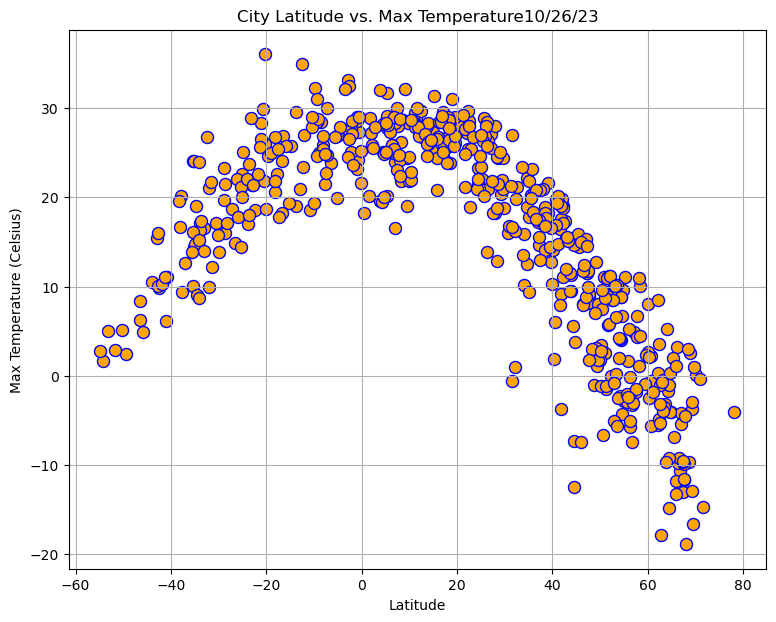

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,8.66,87,75,4.12,CA,1698377718
1,punta cana,18.5818,-68.4043,23.87,94,75,2.57,DO,1698377953
2,port-aux-francais,-49.3500,70.2167,2.48,78,7,4.35,TF,1698377994
3,constantia,44.1833,28.6500,15.39,67,36,3.28,RO,1698377994
4,waitangi,-43.9535,-176.5597,10.46,77,81,6.71,NZ,1698377994
...,...,...,...,...,...,...,...,...,...
541,khanbari,27.3747,87.2039,21.86,55,0,1.53,NP,1698378061
542,zuni pueblo,35.0725,-108.8506,9.35,52,100,3.25,US,1698378062
543,yelizovo,53.1873,158.3805,10.08,40,0,4.00,RU,1698378062


In [82]:
# Build scatter plot for latitude vs. temperature
xlatscatter = [city_data_df['Lat']]
ytempscatter = [city_data_df['Max Temp']]


# Incorporate the other graph properties
plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ytempscatter, marker="o", facecolors="orange", edgecolors="blue",s =75)

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
city_data_df

#### Latitude Vs. Humidity

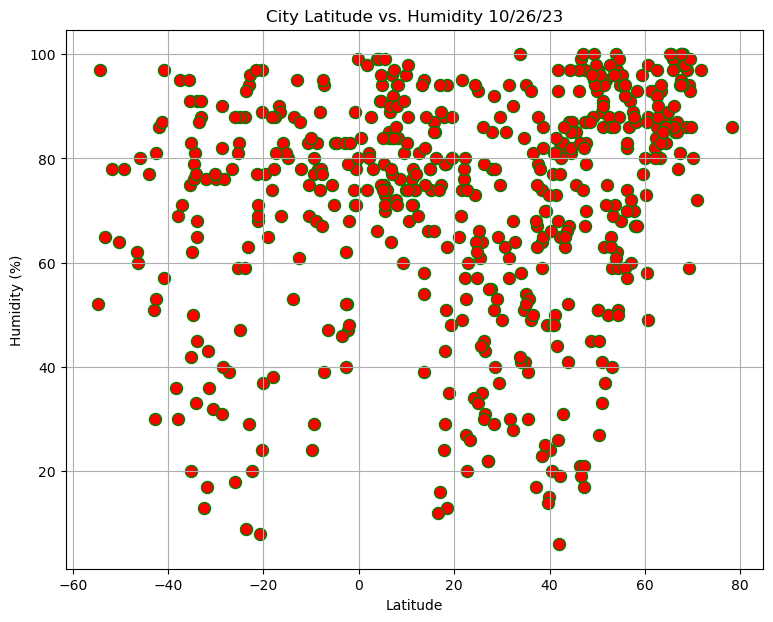

In [83]:

yhumidityScatter = [city_data_df['Humidity']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, yhumidityScatter, marker="o", facecolors="red", edgecolors="green",s =75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

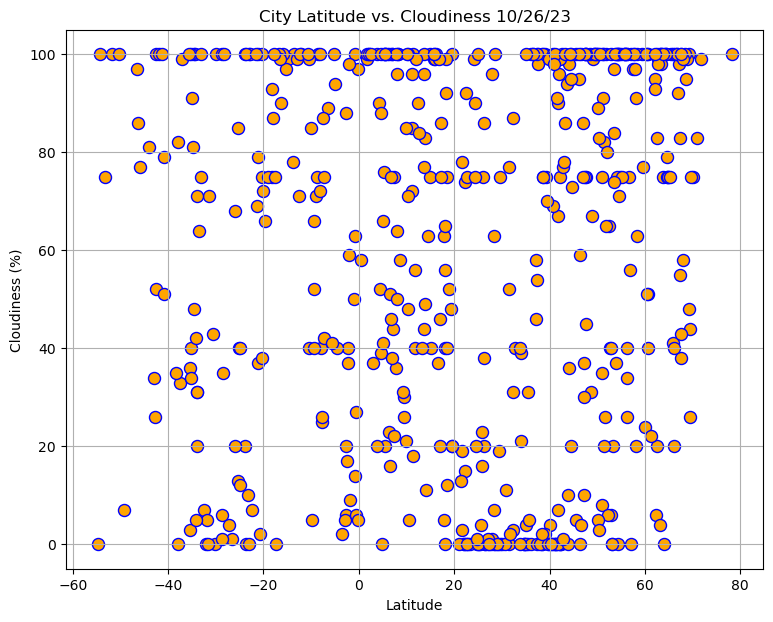

In [84]:
# Build the scatter plots for latitude vs. cloudiness
ycloudscatter = [city_data_df['Cloudiness']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ycloudscatter, marker="o", facecolors="orange", edgecolors="blue",s =75)


plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

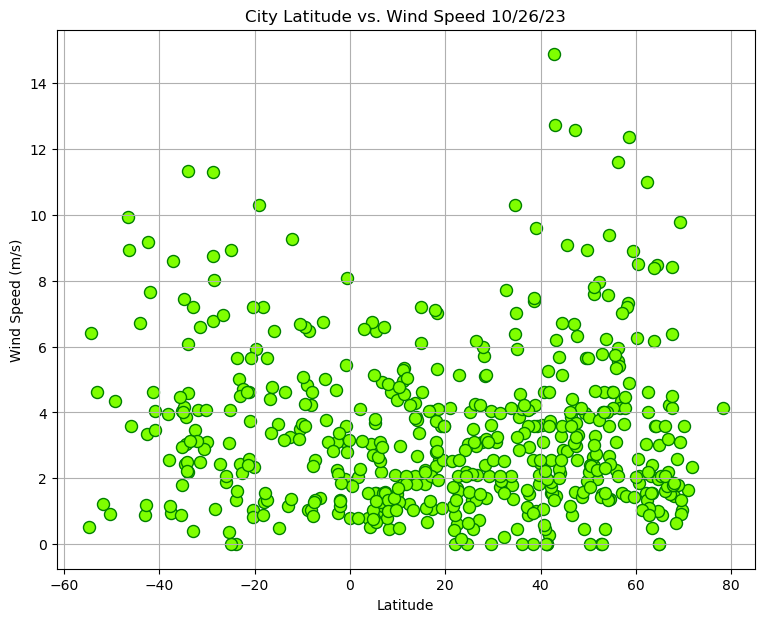

In [85]:
# Build the scatter plots for latitude vs. wind speed
ywindscatter = [city_data_df['Wind Speed']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ywindscatter, marker="o", facecolors="chartreuse", edgecolors="green",s =75)


plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,8.66,87,75,4.12,CA,1698377718
1,punta cana,18.5818,-68.4043,23.87,94,75,2.57,DO,1698377953
3,constantia,44.1833,28.6500,15.39,67,36,3.28,RO,1698377994
5,gadzhiyevo,69.2551,33.3362,-3.67,94,100,3.11,RU,1698377994
7,puerto armuelles,8.2833,-82.8667,26.16,84,100,0.45,PA,1698377968


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.48,78,7,4.35,TF,1698377994
4,waitangi,-43.9535,-176.5597,10.46,77,81,6.71,NZ,1698377994
6,adamstown,-25.0660,-130.1015,22.57,83,40,4.07,PN,1698377814
11,atafu village,-8.5421,-172.5159,28.43,78,100,6.46,TK,1698377995
12,labasa,-16.4167,179.3833,26.92,69,90,4.76,FJ,1698377995


###  Temperature vs. Latitude Linear Regression Plot

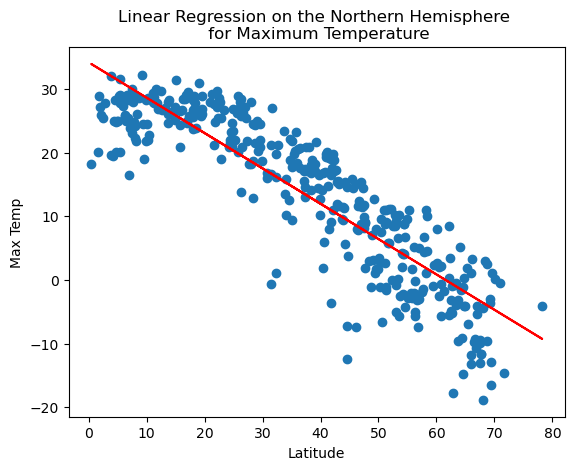

In [89]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

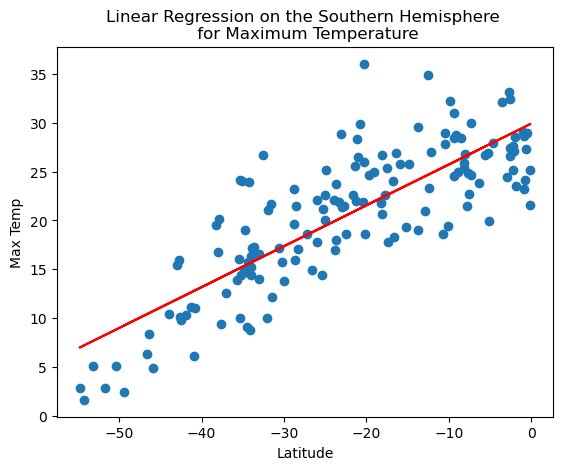

In [90]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

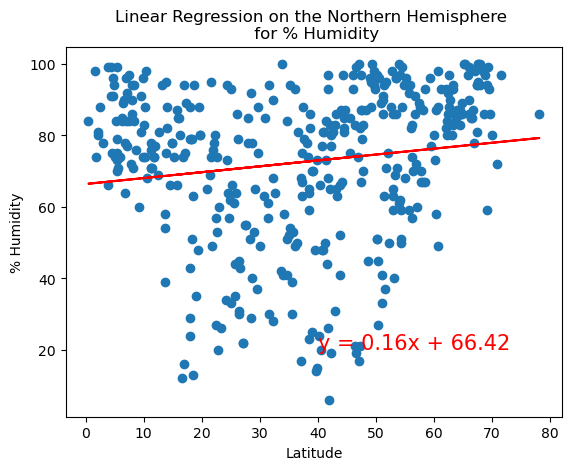

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

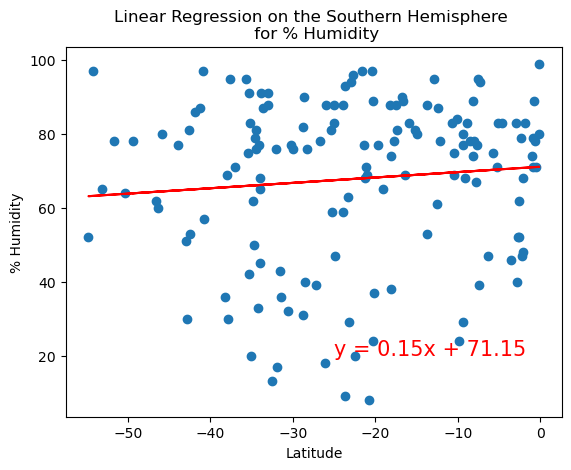

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

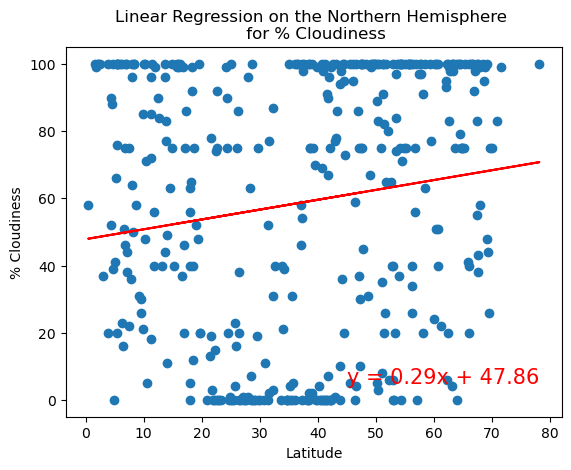

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

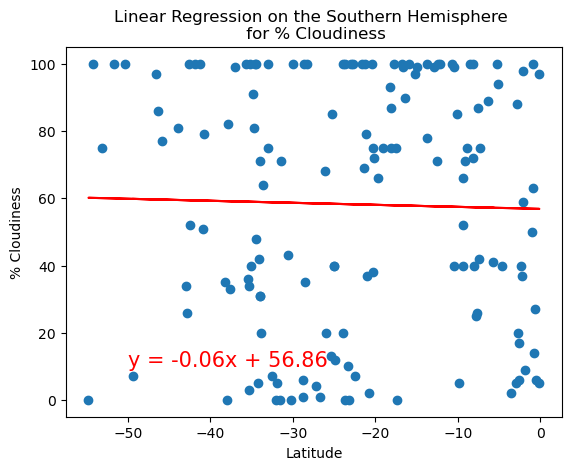

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

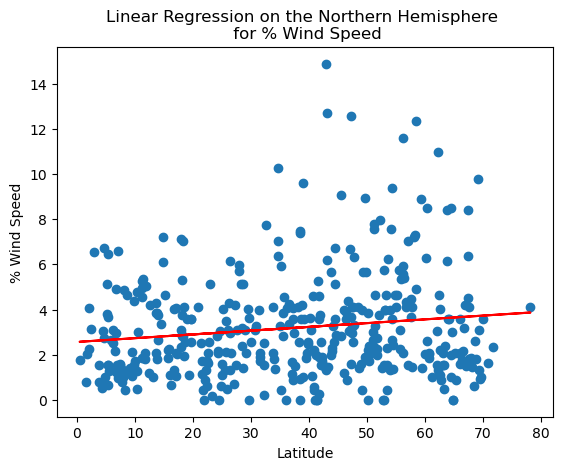

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

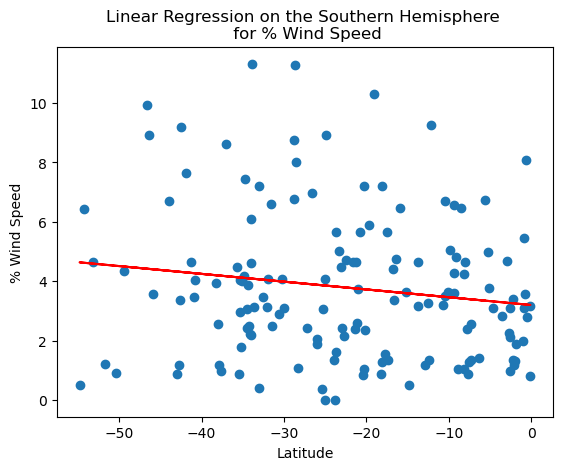

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE